In [3]:
# Cài đặt thư viện nếu chưa có
#install.packages(c("readr", "ggplot2", "dplyr"))  # Để đọc CSV, vẽ biểu đồ, và xử lý dữ liệu
library(readr)
library(ggplot2)
library(dplyr)


In [59]:
# Đọc dữ liệu từ file CSV (giả sử bạn copy dữ liệu vào file data1.csv)
data <- read_csv("data/data1.csv")

# Đổi tên cột cho dễ dùng (xóa dấu ngoặc và khoảng trắng)
colnames(data) <- c("Gioi_tinh", "Tuoi", "Thu_nhap", "BMI", "Dia_diem", "Tieu_duong", "Tim_mach", "Gay_xuong_hong", "Thoi_gian_nam_vien")
data <- data %>%
  mutate(
    Gioi_tinh_bin = ifelse(Gioi_tinh == "Nam", 1, 0),
    Tieu_duong_bin = ifelse(Tieu_duong == "Có", 1, 0),
    Tim_mach_bin = ifelse(Tim_mach == "Có", 1, 0),
    Gay_xuong_hong_bin = ifelse(Gay_xuong_hong == "Có", 1, 0)
  )

head(data)
dim(data)

Rows: 342 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Giới tính, Thu nhập, Địa điểm sinh sống, Tiểu đường, Tim mạch, Gãy ...
dbl (3): Tuổi, BMI, Thời gian nằm viện (ngày)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Gioi_tinh,Tuoi,Thu_nhap,BMI,Dia_diem,Tieu_duong,Tim_mach,Gay_xuong_hong,Thoi_gian_nam_vien,Gioi_tinh_bin,Tieu_duong_bin,Tim_mach_bin,Gay_xuong_hong_bin
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nam,92,Trung bình,22.09145,Nông thôn,Có,Có,Không,25,1,1,1,0
Nữ,89,Trung bình,24.00993,Thành thị,Có,Không,Không,28,0,1,0,0
Nữ,82,Trung bình,24.70227,Thành thị,Không,Có,Không,31,0,0,1,0
Nữ,69,Nghèo,27.48269,Nông thôn,Có,Không,Không,23,0,1,0,0
Nam,64,Trung bình,25.71080,Nông thôn,Có,Không,Không,21,1,1,0,0
Nam,93,Trung bình,19.65862,Nông thôn,Có,Không,Không,25,1,1,0,0


[1] 342  13

      Tuoi            BMI        Thoi_gian_nam_vien
 Min.   :60.00   Min.   :15.00   Min.   : 5.00     
 1st Qu.:69.00   1st Qu.:23.03   1st Qu.:20.00     
 Median :77.00   Median :25.69   Median :25.00     
 Mean   :77.35   Mean   :25.57   Mean   :26.31     
 3rd Qu.:86.00   3rd Qu.:27.93   3rd Qu.:31.00     
 Max.   :94.00   Max.   :35.11   Max.   :52.00     

[1] "Tần suất cho Gioi_tinh"

     Nam       Nữ 
45.32164 54.67836 
[1] "Tần suất cho Thu_nhap"

   Giàu có      Nghèo Trung bình 
  21.34503   27.77778   50.87719 
[1] "Tần suất cho Dia_diem"

Nông thôn Thành thị 
 40.93567  59.06433 
[1] "Tần suất cho Tieu_duong"

      Có    Không 
31.28655 68.71345 
[1] "Tần suất cho Tim_mach"

      Có    Không 
40.93567 59.06433 
[1] "Tần suất cho Gay_xuong_hong"

      Có    Không 
11.69591 88.30409 


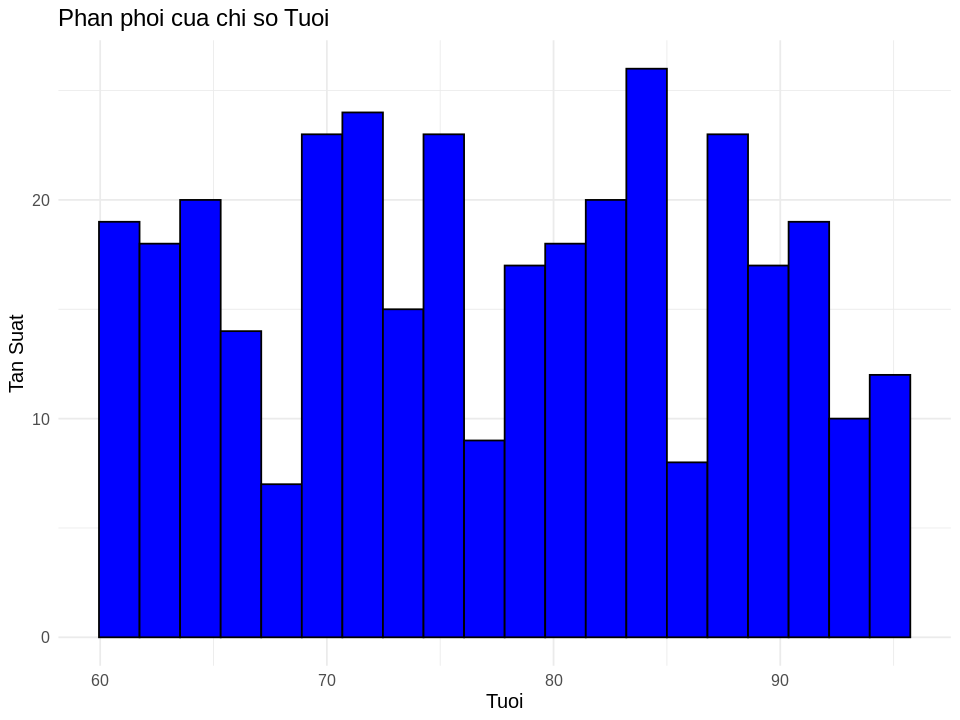

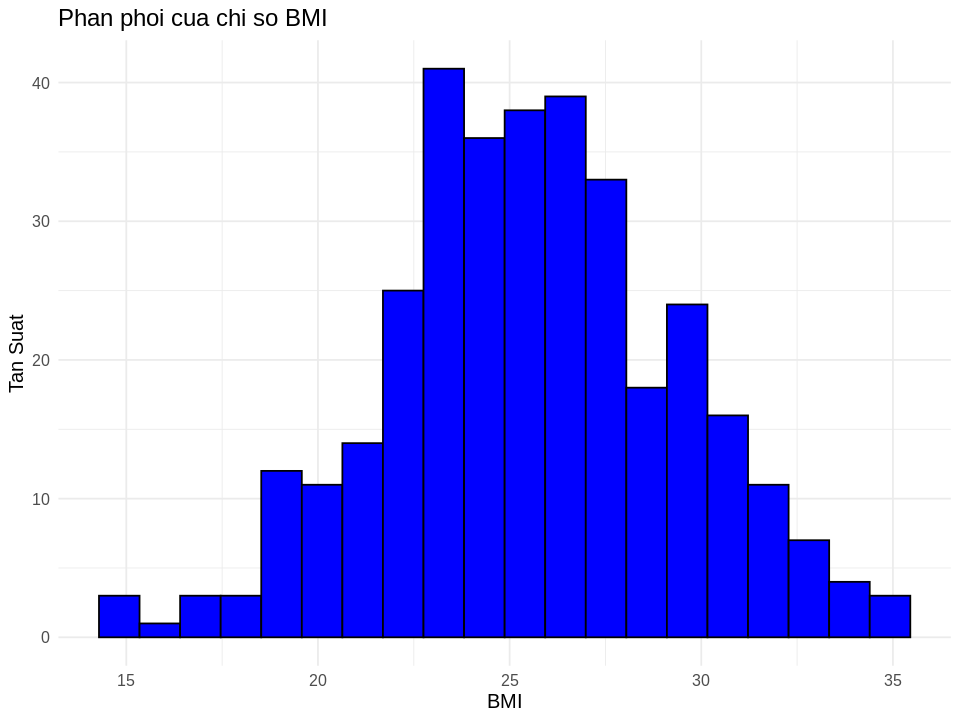

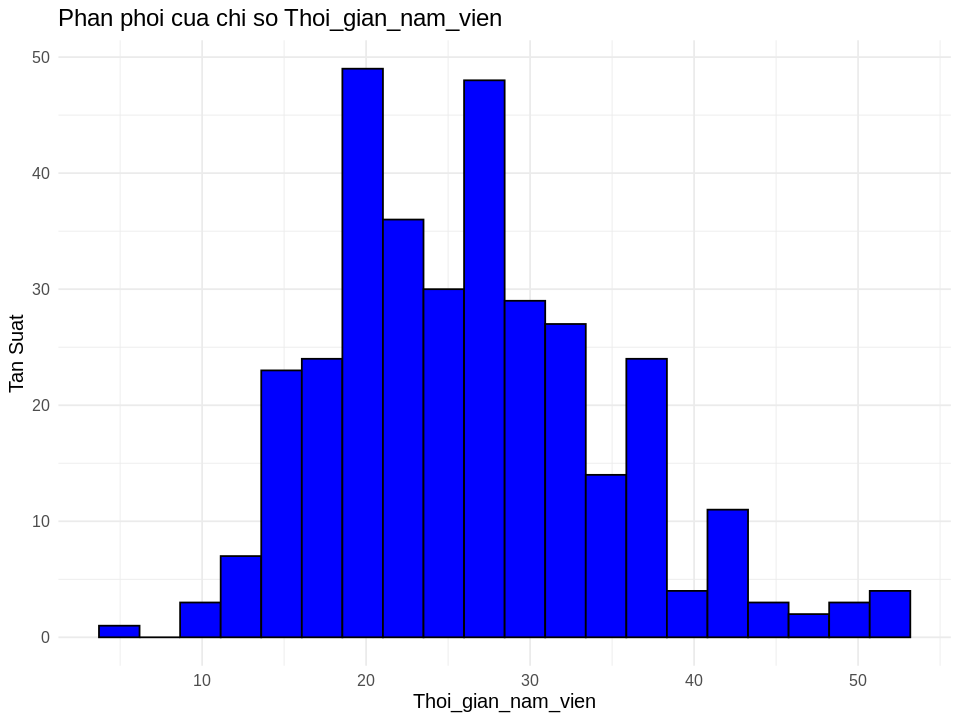

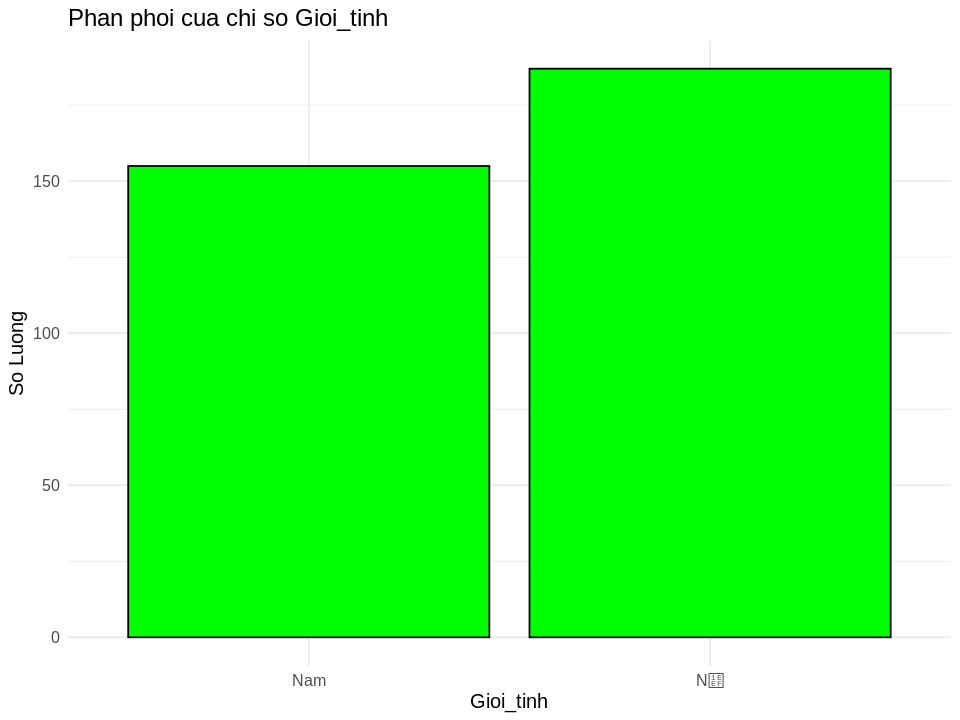

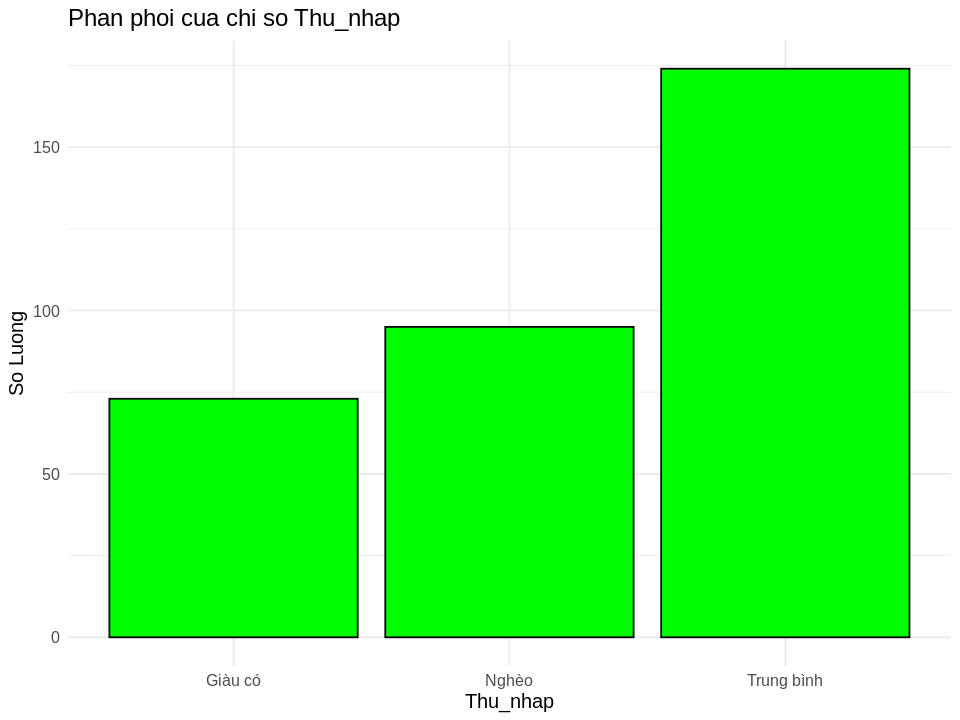

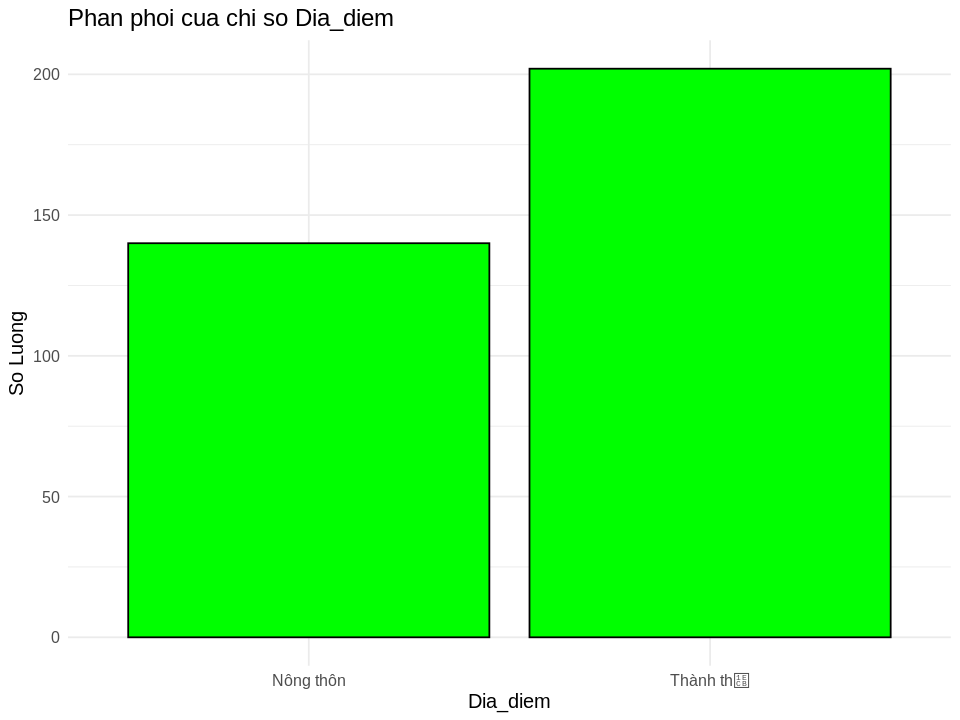

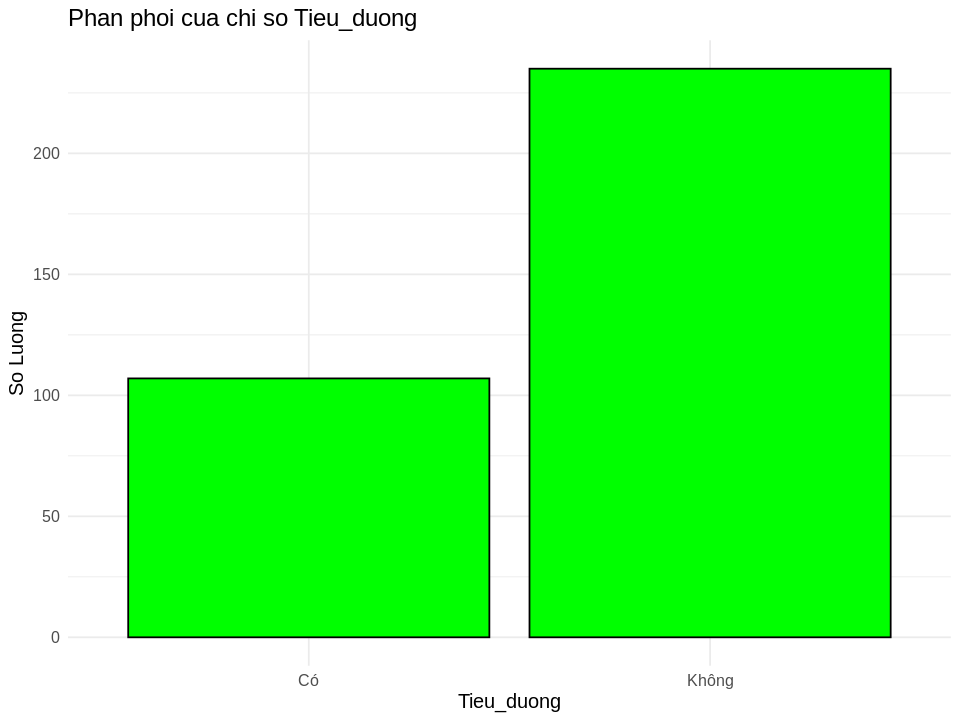

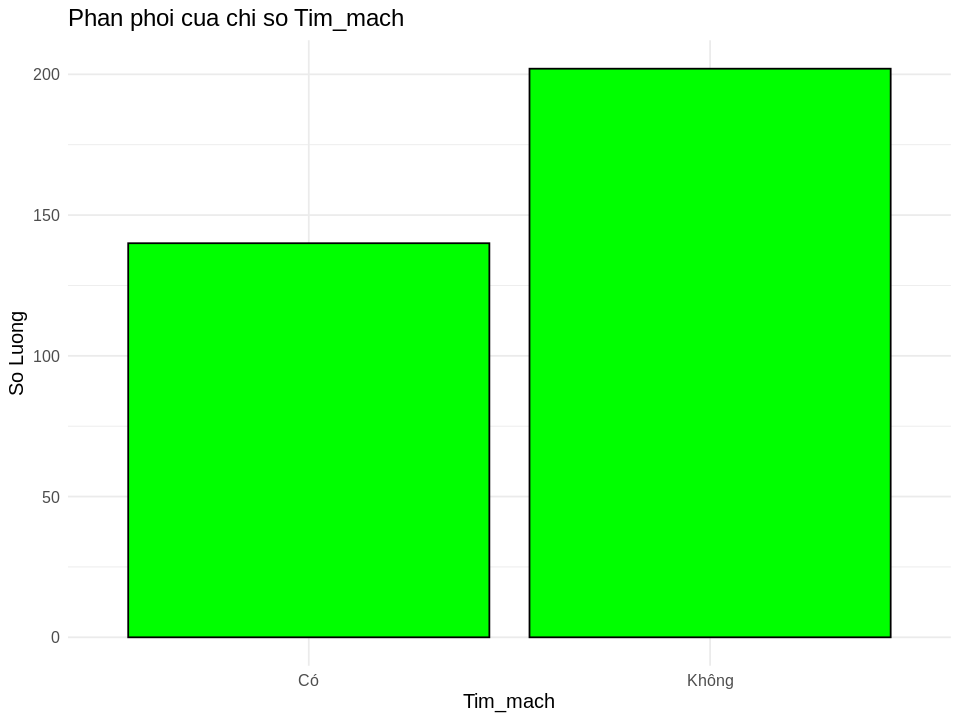

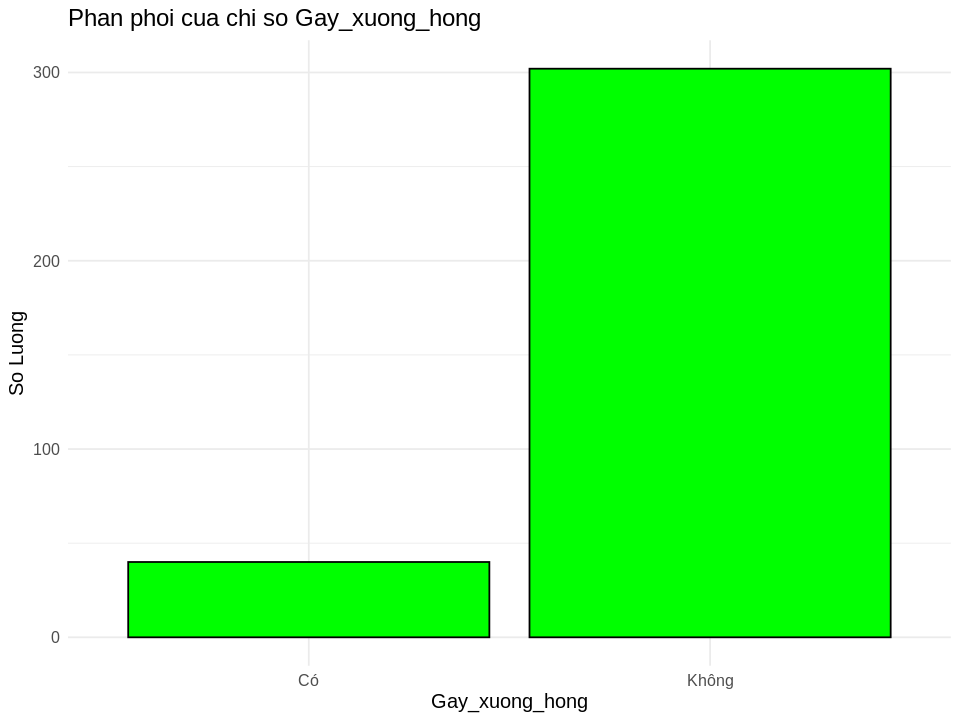

In [60]:
# Thống kê mô tả cho các biến định lượng
quant_vars <- c("Tuoi", "BMI", "Thoi_gian_nam_vien")
summary(data[, quant_vars])

# Biến định tính (tần suất phần trăm)
qual_vars <- c("Gioi_tinh", "Thu_nhap", "Dia_diem", "Tieu_duong", "Tim_mach", "Gay_xuong_hong")
for (var in qual_vars) {
    print(paste("Tần suất cho", var))
    print(prop.table(table(data[[var]])) * 100)
}

# Điều chỉnh kích thước biểu đồ
options(repr.plot.width = 8, repr.plot.height = 6)

# Trực quan hóa định lượng (histogram)
for (var in quant_vars) {
  p <- ggplot(data, aes(x = .data[[var]])) +
    geom_histogram(bins = 20, fill = "blue", color = "black") +
    labs(title = paste("Phan phoi cua chi so", var), x = var, y = "Tan Suat") +
    theme_minimal() +
    theme(text = element_text(size = 12))
  print(p)
}

# Trực quan hóa định tính (barplot)
for (var in qual_vars) {
  p <- ggplot(data, aes(x = .data[[var]])) +
    geom_bar(fill = "green", color = "black") +
    labs(title = paste("Phan phoi cua chi so", var), x = var, y = "So Luong") +
    theme_minimal() +
    theme(text = element_text(size = 12))
  print(p)
}


Call:
lm(formula = Thoi_gian_nam_vien ~ Tuoi, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.387  -6.014  -1.387   4.616  26.487 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.59677    3.47641   4.774 2.69e-06 ***
Tuoi         0.12558    0.04457   2.818  0.00512 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.314 on 340 degrees of freedom
Multiple R-squared:  0.02282,	Adjusted R-squared:  0.01994 
F-statistic: 7.939 on 1 and 340 DF,  p-value: 0.00512


`geom_smooth()` using formula = 'y ~ x'


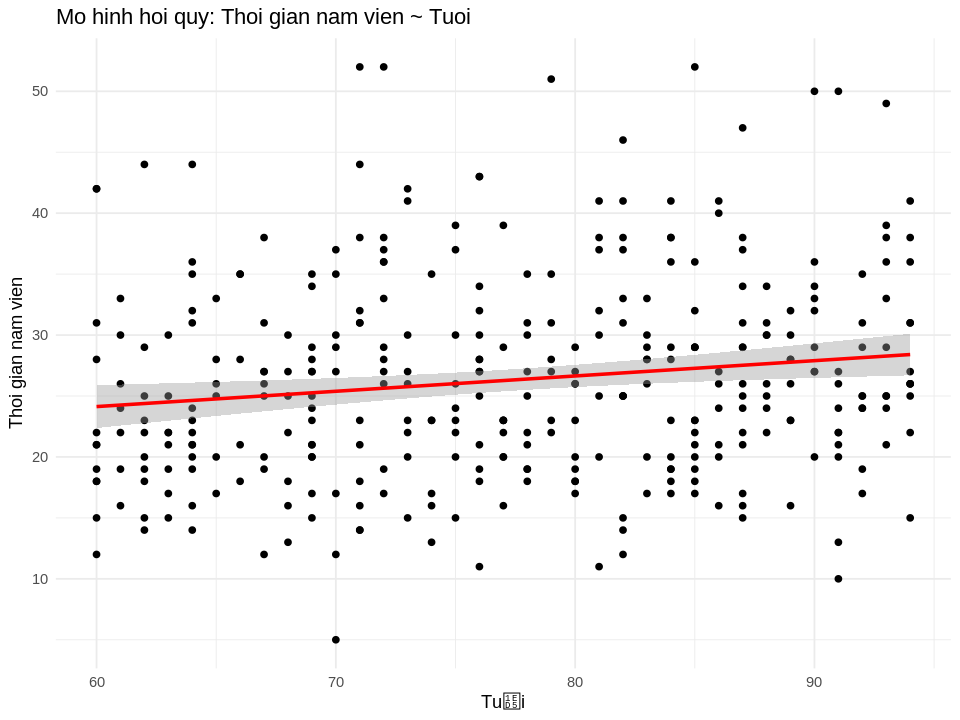

In [61]:
## Mô hình hồi quy tuyến tính
lin_model <- lm(Thoi_gian_nam_vien ~ Tuoi, data = data)
summary(lin_model)

# Trực quan hóa
ggplot(data, aes(x = Tuoi, y = Thoi_gian_nam_vien)) +
  geom_point() +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Mo hinh hoi quy: Thoi gian nam vien ~ Tuoi", x = "Tuổi", y = "Thoi gian nam vien") +
  theme_minimal()


In [63]:
# Mô hình 1: Gãy xương hông ~ Tiểu đường
cat("Mô hình 1: Gãy xương hông ~ Tiểu đường")
log_model1 <- glm(Gay_xuong_hong_bin ~ Tieu_duong_bin, data = data, family = binomial)
summary(log_model1)
exp(coef(log_model1))  # Tính toán Odds Ratios

# Mô hình 2: Tiểu đường ~ Giới tính
cat("\n Mô hình 2: Tiểu đường ~ Giới tính")
log_model2 <- glm(Tieu_duong_bin ~ Gioi_tinh_bin, data = data, family = binomial)
summary(log_model2)
exp(coef(log_model2))  # Tính toán Odds Ratios



Mô hình 1: Gãy xương hông ~ Tiểu đường


Call:
glm(formula = Gay_xuong_hong_bin ~ Tieu_duong_bin, family = binomial, 
    data = data)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -2.0842     0.2080 -10.023   <2e-16 ***
Tieu_duong_bin   0.1907     0.3542   0.538     0.59    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 246.80  on 341  degrees of freedom
Residual deviance: 246.52  on 340  degrees of freedom
AIC: 250.52

Number of Fisher Scoring iterations: 4


(Intercept) Tieu_duong_bin 
     0.1244019      1.2100910


 Mô hình 2: Tiểu đường ~ Giới tính


Call:
glm(formula = Tieu_duong_bin ~ Gioi_tinh_bin, family = binomial, 
    data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -0.6771     0.1547  -4.377 1.21e-05 ***
Gioi_tinh_bin  -0.2482     0.2360  -1.052    0.293    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 425.02  on 341  degrees of freedom
Residual deviance: 423.91  on 340  degrees of freedom
AIC: 427.91

Number of Fisher Scoring iterations: 4


(Intercept) Gioi_tinh_bin 
    0.5080645     0.7802088